In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create output directory if it doesn't exist
os.makedirs('output', exist_ok=True)

df = pd.read_csv('heatmap_layer_statistics_modelmask.csv')
print(f"Samples: {df['filename'].nunique()} | Models: {df['model'].unique()} | XAI: {df['xai_method'].unique()}\n")

# Save basic dataset info to CSV
dataset_info = pd.DataFrame({
    'Metric': ['Total Samples', 'Number of Models', 'Number of XAI Methods'],
    'Value': [df['filename'].nunique(), len(df['model'].unique()), len(df['xai_method'].unique())]
})
models_list = pd.DataFrame({'Models': df['model'].unique()})
xai_list = pd.DataFrame({'XAI Methods': df['xai_method'].unique()})

Samples: 199 | Models: ['ResNet-50' 'timm_efficientnet-b4' 'vit-base-patch16-224' 'RETFound_mae'] | XAI: ['GradCAM' 'ScoreCAM' 'RISE' 'CRP_LXT' 'Attention']



# Background percentage analysis

In [14]:
# Background percentage analysis
df_label1 = df[df['label'] == 1]
df_label0 = df[df['label'] == 0]
bg = df_label1[df_label1['layer_name'] == 'Background'].groupby(['model', 'xai_method'])['importance_percentage'].mean().reset_index()
bg.columns = ['Model', 'XAI', 'Background%']
print("=== BACKGROUND PERCENTAGE (Lower is Better) ===")
print(bg.sort_values('Background%').to_string(index=False))
bg.sort_values('Background%').to_csv('output/output_background_percentage_by_model_xai.csv', index=False)
print("✓ Saved to: output/output_background_percentage_by_model_xai.csv")

bg_merged = df_label1[df_label1['layer_name'] == 'Background'].groupby(['xai_method'])['importance_percentage'].mean().reset_index()
bg_merged.columns = ['XAI', 'Background%']
print("\n=== BACKGROUND PERCENTAGE Merge Model (Lower is Better) ===")
print(bg_merged.sort_values('Background%').to_string(index=False))
bg_merged.sort_values('Background%').to_csv('output/output_background_percentage_by_xai.csv', index=False)
print("✓ Saved to: output/output_background_percentage_by_xai.csv")

=== BACKGROUND PERCENTAGE (Lower is Better) ===
               Model       XAI  Background%
vit-base-patch16-224   GradCAM    16.189922
vit-base-patch16-224  ScoreCAM    35.712263
        RETFound_mae  ScoreCAM    42.996169
vit-base-patch16-224 Attention    51.422943
        RETFound_mae Attention    53.752430
           ResNet-50   GradCAM    55.407701
vit-base-patch16-224      RISE    72.773423
timm_efficientnet-b4  ScoreCAM    73.334476
timm_efficientnet-b4   GradCAM    77.509388
           ResNet-50      RISE    79.917163
        RETFound_mae      RISE    82.496284
           ResNet-50   CRP_LXT    82.763618
timm_efficientnet-b4   CRP_LXT    83.034309
timm_efficientnet-b4      RISE    83.715328
        RETFound_mae   GradCAM    86.191217
           ResNet-50  ScoreCAM    90.830664
✓ Saved to: output/output_background_percentage_by_model_xai.csv

=== BACKGROUND PERCENTAGE Merge Model (Lower is Better) ===
      XAI  Background%
Attention    52.587686
  GradCAM    58.824557
 ScoreCAM

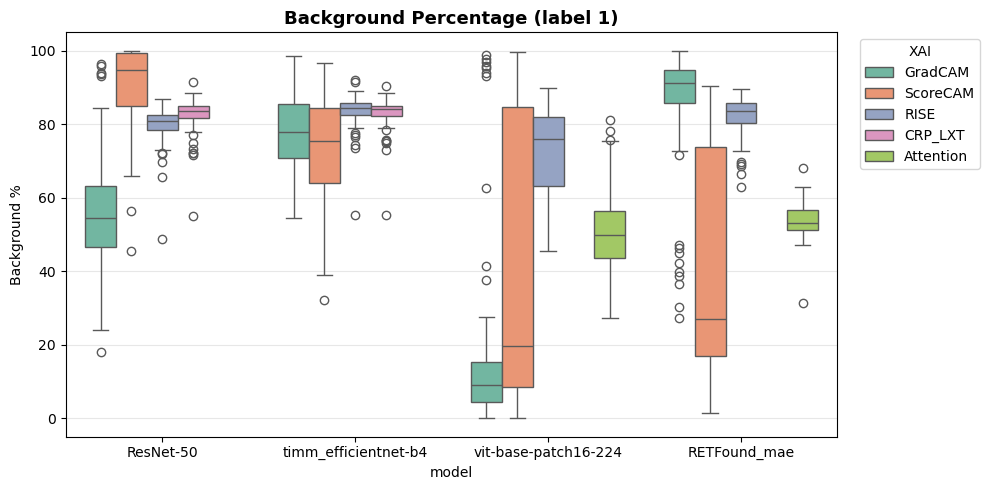

In [15]:
# Plot 1: Background percentage box plot
bg_data = df_label1[df_label1['layer_name'] == 'Background']
plt.figure(figsize=(10, 5))
sns.boxplot(data=bg_data, x='model', y='importance_percentage', hue='xai_method', palette='Set2')
plt.title('Background Percentage (label 1)', fontsize=13, fontweight='bold')
plt.ylabel('Background %')
plt.legend(title='XAI', bbox_to_anchor=(1.02, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


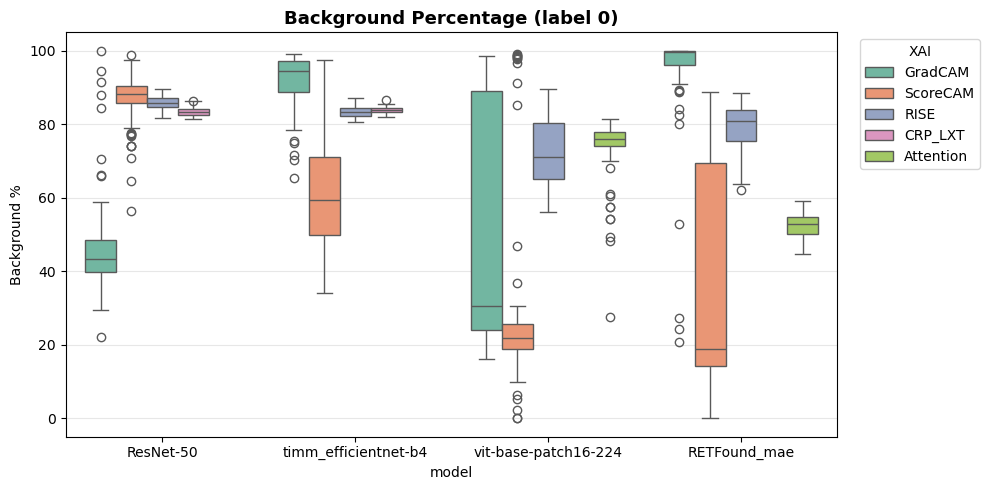

In [16]:
# Plot 1: Background percentage box plot
bg_data = df_label0[df_label0['layer_name'] == 'Background']
plt.figure(figsize=(10, 5))
sns.boxplot(data=bg_data, x='model', y='importance_percentage', hue='xai_method', palette='Set2')
plt.title('Background Percentage (label 0)', fontsize=13, fontweight='bold')
plt.ylabel('Background %')
plt.legend(title='XAI', bbox_to_anchor=(1.02, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

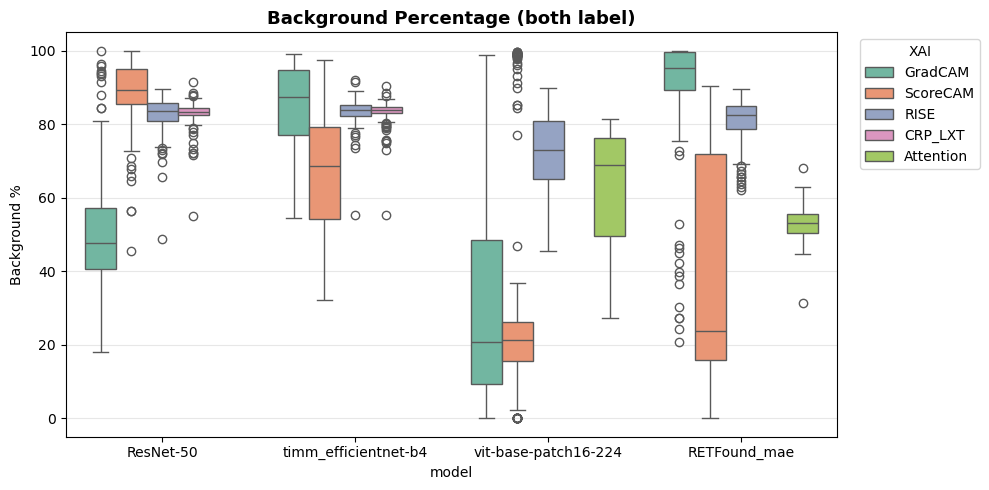

In [17]:
# Plot 1: Background percentage box plot
bg_data = df[df['layer_name'] == 'Background']
plt.figure(figsize=(10, 5))
sns.boxplot(data=bg_data, x='model', y='importance_percentage', hue='xai_method', palette='Set2')
plt.title('Background Percentage (both label)', fontsize=13, fontweight='bold')
plt.ylabel('Background %')
plt.legend(title='XAI', bbox_to_anchor=(1.02, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mean value of Background v.s. Layers


LABEL 0 (Control)
               Model       XAI  Mean_Background  Mean_Layers  Diff (BG - Layers)
        RETFound_mae Attention             0.14         0.66               -0.52
vit-base-patch16-224  ScoreCAM             0.10         0.61               -0.50
           ResNet-50   GradCAM             0.06         0.32               -0.27
vit-base-patch16-224   GradCAM             0.30         0.57               -0.27
vit-base-patch16-224      RISE             0.34         0.56               -0.23
        RETFound_mae  ScoreCAM             0.15         0.37               -0.22
timm_efficientnet-b4  ScoreCAM             0.06         0.21               -0.15
vit-base-patch16-224 Attention             0.22         0.35               -0.13
        RETFound_mae      RISE             0.41         0.51               -0.09
timm_efficientnet-b4      RISE             0.48         0.49               -0.01
           ResNet-50   CRP_LXT             0.11         0.11               -0.00
timm_effi

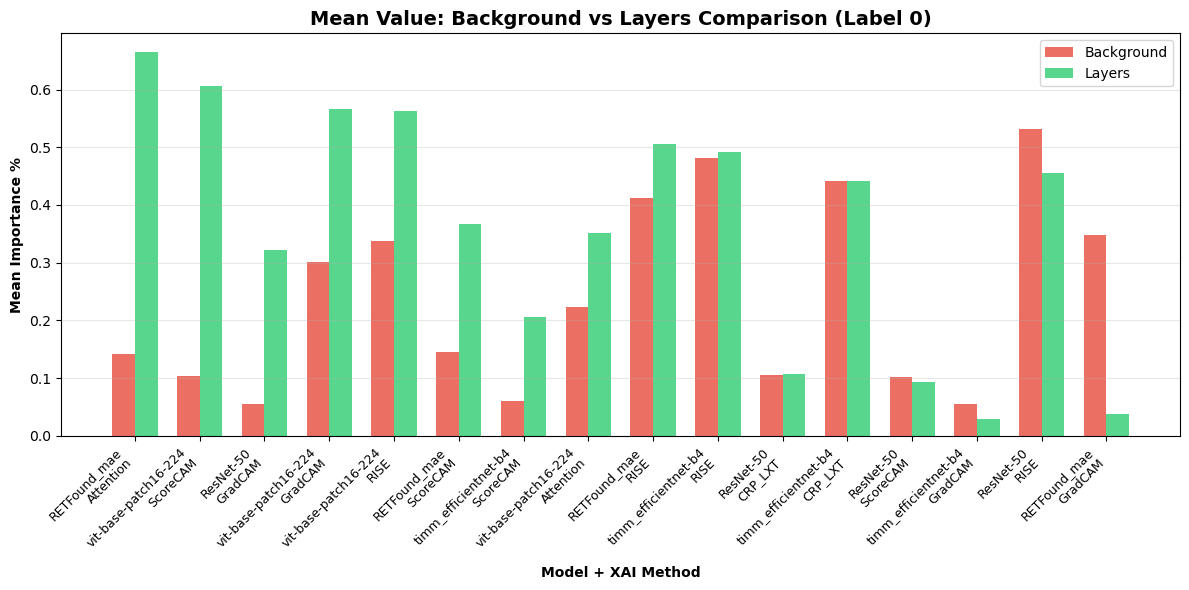


LABEL 1 (DME)
               Model       XAI  Mean_Background  Mean_Layers  Diff (BG - Layers)
        RETFound_mae Attention             0.15         0.66               -0.50
vit-base-patch16-224 Attention             0.09         0.36               -0.27
        RETFound_mae  ScoreCAM             0.15         0.42               -0.27
vit-base-patch16-224   GradCAM             0.06         0.26               -0.20
vit-base-patch16-224      RISE             0.30         0.49               -0.19
           ResNet-50   GradCAM             0.09         0.27               -0.18
vit-base-patch16-224  ScoreCAM             0.21         0.35               -0.14
           ResNet-50      RISE             0.45         0.55               -0.11
timm_efficientnet-b4  ScoreCAM             0.05         0.11               -0.05
timm_efficientnet-b4   GradCAM             0.04         0.06               -0.02
        RETFound_mae      RISE             0.51         0.51               -0.00
           Re

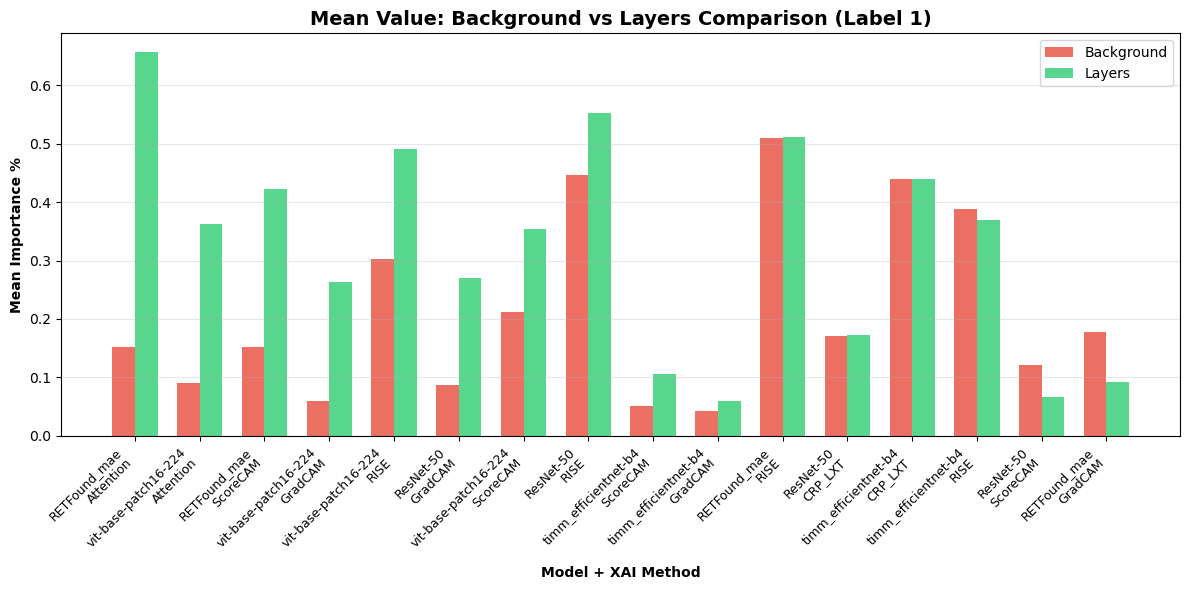


BOTH LABELS
               Model       XAI  Mean_Background  Mean_Layers  Diff (BG - Layers)
        RETFound_mae Attention             0.15         0.66               -0.51
vit-base-patch16-224  ScoreCAM             0.16         0.48               -0.32
        RETFound_mae  ScoreCAM             0.15         0.40               -0.25
vit-base-patch16-224   GradCAM             0.18         0.42               -0.24
           ResNet-50   GradCAM             0.07         0.30               -0.22
vit-base-patch16-224      RISE             0.32         0.53               -0.21
vit-base-patch16-224 Attention             0.16         0.36               -0.20
timm_efficientnet-b4  ScoreCAM             0.06         0.16               -0.10
        RETFound_mae      RISE             0.46         0.51               -0.05
           ResNet-50      RISE             0.49         0.50               -0.01
           ResNet-50   CRP_LXT             0.14         0.14               -0.00
timm_efficientn

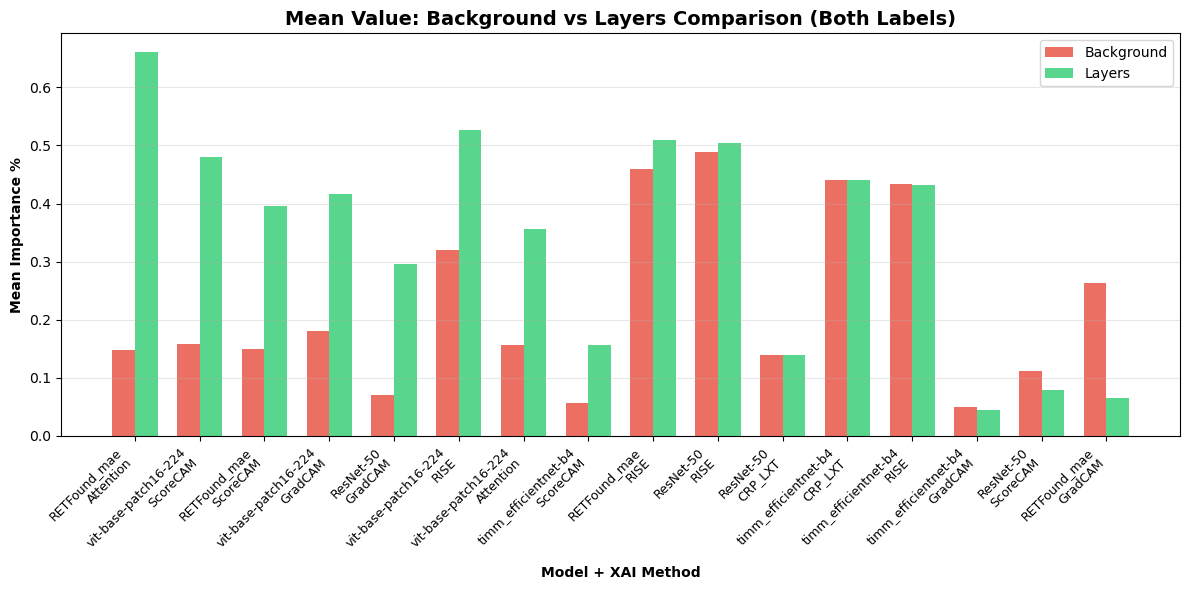

In [ ]:
# Function to calculate and visualize mean comparison
def mean_comparison_analysis(data, label_type, label_value=None):
    if label_value is not None:
        filtered_data = data[data['label'] == label_value]
        title_suffix = f"(Label {label_value})"
        filename_suffix = f"_label{label_value}"
    else:
        filtered_data = data
        title_suffix = "(Both Labels)"
        filename_suffix = "_both_labels"
    
    # Check which column to use
    col_name = 'mean' if 'mean' in filtered_data.columns else 'importance_percentage'
    
    # Calculate mean for background and non-background
    bg_mean = filtered_data[filtered_data['layer_name'] == 'Background'].groupby(['model', 'xai_method'])[col_name].mean().reset_index()
    bg_mean.columns = ['Model', 'XAI', 'Mean_Background']
    
    layers_mean = filtered_data[filtered_data['layer_name'] != 'Background'].groupby(['model', 'xai_method'])[col_name].mean().reset_index()
    layers_mean.columns = ['Model', 'XAI', 'Mean_Layers']
    
    # Merge and calculate difference
    comparison_mean = pd.merge(bg_mean, layers_mean, on=['Model', 'XAI'])
    comparison_mean['Diff (BG - Layers)'] = comparison_mean['Mean_Background'] - comparison_mean['Mean_Layers']
    comparison_mean = comparison_mean.sort_values('Diff (BG - Layers)')
    
    print(f"\n{'='*80}")
    print(f"{label_type}")
    print('='*80)
    print(comparison_mean.round(2).to_string(index=False))
    
    # Save to CSV
    csv_filename = f'output/output_mean_background_vs_layers{filename_suffix}.csv'
    comparison_mean.to_csv(csv_filename, index=False)
    print(f"\n✓ Saved to: {csv_filename}")
    
    # Visualize with bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(comparison_mean))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, comparison_mean['Mean_Background'], width, label='Background', alpha=0.8, color='#e74c3c')
    bars2 = ax.bar(x + width/2, comparison_mean['Mean_Layers'], width, label='Layers', alpha=0.8, color='#2ecc71')
    
    ax.set_xlabel('Model + XAI Method', fontweight='bold')
    ax.set_ylabel('Mean Importance %', fontweight='bold')
    ax.set_title(f'Mean Value: Background vs Layers Comparison {title_suffix}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f"{row['Model']}\n{row['XAI']}" for _, row in comparison_mean.iterrows()], 
                        rotation=45, ha='right', fontsize=9)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyze for Label 0
mean_comparison_analysis(df, "LABEL 0 (Control)", label_value=0)

# Analyze for Label 1
mean_comparison_analysis(df, "LABEL 1 (DME)", label_value=1)

# Analyze for Both Labels
mean_comparison_analysis(df, "BOTH LABELS", label_value=None)


# Mean value - by XAI Method & Baseline Models


ANALYSIS BY XAI METHOD (AVERAGED ACROSS MODELS)

LABEL 0 (Control) - AVERAGED ACROSS ALL MODELS
      XAI  Mean_Background  Mean_Layers  Diff (BG - Layers)
Attention             0.18         0.51               -0.32
 ScoreCAM             0.10         0.32               -0.22
     RISE             0.44         0.50               -0.06
  GradCAM             0.19         0.24               -0.05
  CRP_LXT             0.27         0.27               -0.00

✓ Saved to: output/output_mean_background_vs_layers_by_xai_label0.csv


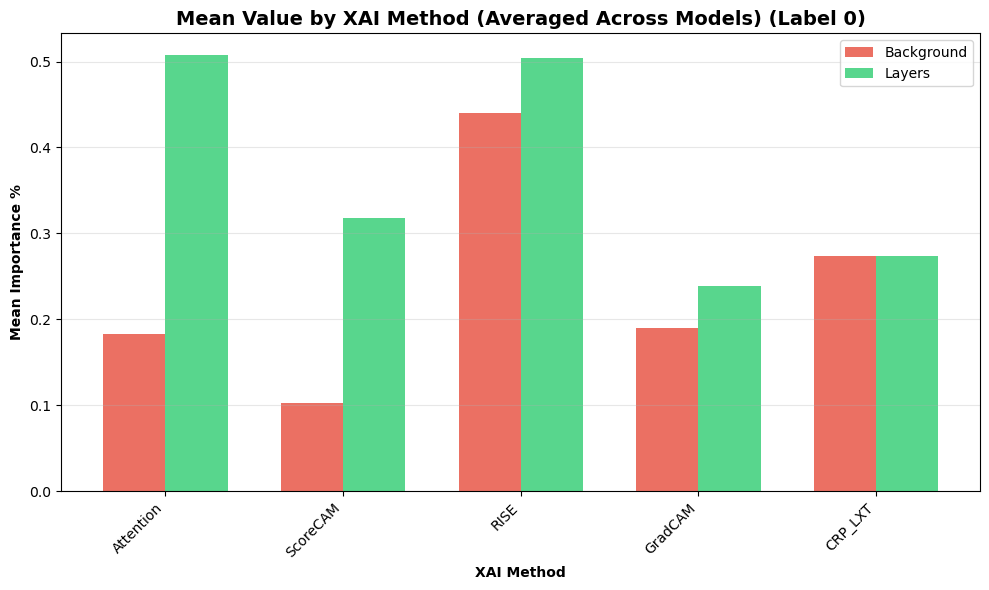


LABEL 1 (DME) - AVERAGED ACROSS ALL MODELS
      XAI  Mean_Background  Mean_Layers  Diff (BG - Layers)
Attention             0.12         0.51               -0.39
 ScoreCAM             0.13         0.24               -0.10
  GradCAM             0.09         0.17               -0.08
     RISE             0.41         0.48               -0.07
  CRP_LXT             0.31         0.31               -0.00

✓ Saved to: output/output_mean_background_vs_layers_by_xai_label1.csv


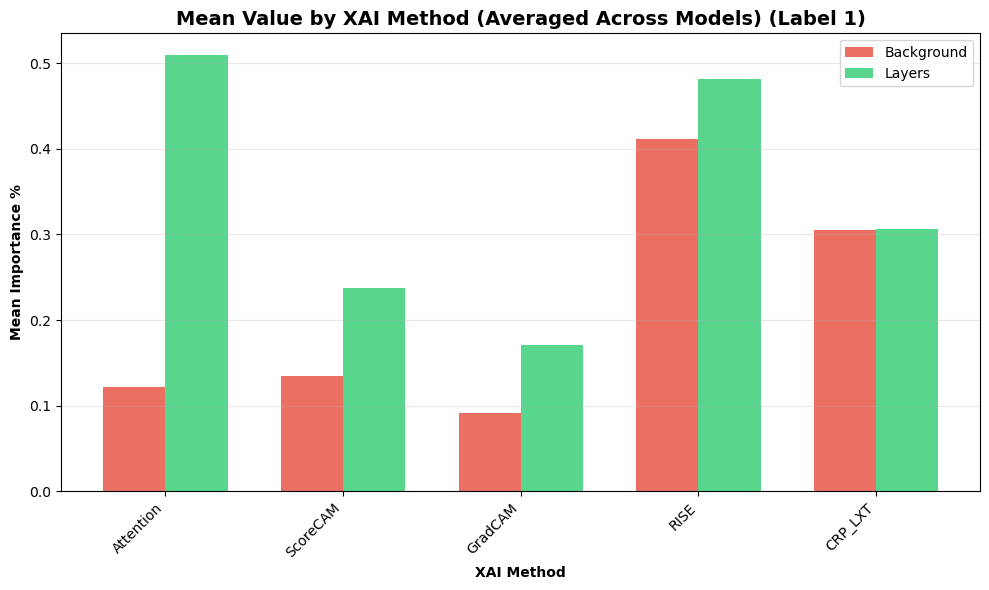


BOTH LABELS - AVERAGED ACROSS ALL MODELS
      XAI  Mean_Background  Mean_Layers  Diff (BG - Layers)
Attention             0.15         0.51               -0.36
 ScoreCAM             0.12         0.28               -0.16
     RISE             0.43         0.49               -0.07
  GradCAM             0.14         0.21               -0.06
  CRP_LXT             0.29         0.29               -0.00

✓ Saved to: output/output_mean_background_vs_layers_by_xai_both_labels.csv


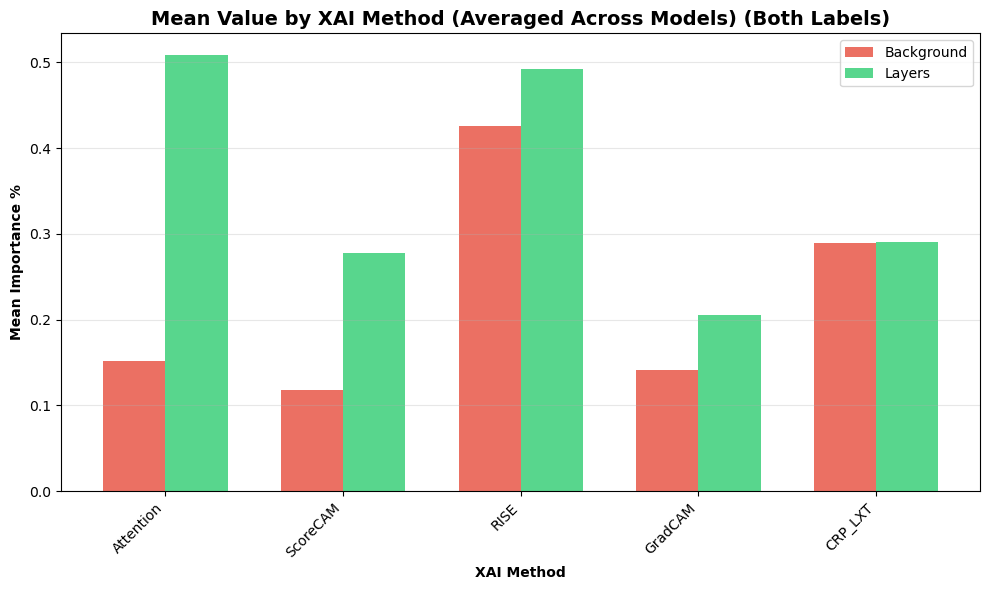

In [29]:
# Function to analyze by XAI method (averaged across models)
def mean_comparison_by_xai(data, label_type, label_value=None):
    if label_value is not None:
        filtered_data = data[data['label'] == label_value]
        title_suffix = f"(Label {label_value})"
        filename_suffix = f"_label{label_value}"
    else:
        filtered_data = data
        title_suffix = "(Both Labels)"
        filename_suffix = "_both_labels"
    
    # Check which column to use
    col_name = 'mean' if 'mean' in filtered_data.columns else 'importance_percentage'
    
    # Calculate mean for background and non-background, grouped by XAI only
    bg_mean = filtered_data[filtered_data['layer_name'] == 'Background'].groupby(['xai_method'])[col_name].mean().reset_index()
    bg_mean.columns = ['XAI', 'Mean_Background']
    
    layers_mean = filtered_data[filtered_data['layer_name'] != 'Background'].groupby(['xai_method'])[col_name].mean().reset_index()
    layers_mean.columns = ['XAI', 'Mean_Layers']
    
    # Merge and calculate difference
    comparison_mean = pd.merge(bg_mean, layers_mean, on=['XAI'])
    comparison_mean['Diff (BG - Layers)'] = comparison_mean['Mean_Background'] - comparison_mean['Mean_Layers']
    comparison_mean = comparison_mean.sort_values('Diff (BG - Layers)')
    
    print(f"\n{'='*80}")
    print(f"{label_type} - AVERAGED ACROSS ALL MODELS")
    print('='*80)
    print(comparison_mean.round(2).to_string(index=False))
    
    # Save to CSV
    csv_filename = f'output/output_mean_background_vs_layers_by_xai{filename_suffix}.csv'
    comparison_mean.to_csv(csv_filename, index=False)
    print(f"\n✓ Saved to: {csv_filename}")
    
    # Visualize with bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(comparison_mean))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, comparison_mean['Mean_Background'], width, label='Background', alpha=0.8, color='#e74c3c')
    bars2 = ax.bar(x + width/2, comparison_mean['Mean_Layers'], width, label='Layers', alpha=0.8, color='#2ecc71')
    
    ax.set_xlabel('XAI Method', fontweight='bold')
    ax.set_ylabel('Mean Importance %', fontweight='bold')
    ax.set_title(f'Mean Value by XAI Method (Averaged Across Models) {title_suffix}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_mean['XAI'], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("="*80)
print("ANALYSIS BY XAI METHOD (AVERAGED ACROSS MODELS)")
print("="*80)

mean_comparison_by_xai(df, "LABEL 0 (Control)", label_value=0)
mean_comparison_by_xai(df, "LABEL 1 (DME)", label_value=1)
mean_comparison_by_xai(df, "BOTH LABELS", label_value=None)


# Max value - by XAI Method & Baseline Models

In [ ]:
# Function to analyze by XAI method (averaged across models)
def max_comparison_by_xai(data, label_type, label_value=None):
    if label_value is not None:
        filtered_data = data[data['label'] == label_value]
        title_suffix = f"(Label {label_value})"
        filename_suffix = f"_label{label_value}"
    else:
        filtered_data = data
        title_suffix = "(Both Labels)"
        filename_suffix = "_both_labels"
    
    # Check which column to use
    col_name = 'max' if 'max' in filtered_data.columns else 'importance_percentage'
    
    # Calculate max for background and non-background, grouped by XAI only
    bg_max = filtered_data[filtered_data['layer_name'] == 'Background'].groupby(['xai_method'])[col_name].max().reset_index()
    bg_max.columns = ['XAI', 'Max_Background']
    
    layers_max = filtered_data[filtered_data['layer_name'] != 'Background'].groupby(['xai_method'])[col_name].max().reset_index()
    layers_max.columns = ['XAI', 'Max_Layers']
    
    # Merge and calculate difference
    comparison_max = pd.merge(bg_max, layers_max, on=['XAI'])
    comparison_max['Diff (BG - Layers)'] = comparison_max['Max_Background'] - comparison_max['Max_Layers']
    comparison_max = comparison_max.sort_values('Diff (BG - Layers)')
    
    print(f"\n{'='*80}")
    print(f"{label_type} - AVERAGED ACROSS ALL MODELS")
    print('='*80)
    print(comparison_max.round(2).to_string(index=False))
    
    # Save to CSV
    csv_filename = f'output/output_max_background_vs_layers_by_xai{filename_suffix}.csv'
    comparison_max.to_csv(csv_filename, index=False)
    print(f"\n✓ Saved to: {csv_filename}")
    
    # Visualize with bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(comparison_max))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, comparison_max['Max_Background'], width, label='Background', alpha=0.8, color='#e74c3c')
    bars2 = ax.bar(x + width/2, comparison_max['Max_Layers'], width, label='Layers', alpha=0.8, color='#2ecc71')
    
    ax.set_xlabel('XAI Method', fontweight='bold')
    ax.set_ylabel('Max Importance %', fontweight='bold')
    ax.set_title(f'Max Value by XAI Method (Averaged Across Models) {title_suffix}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_max['XAI'], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Function to analyze baseline models (if they exist)
def max_comparison_baseline_models(data, label_type, label_value=None):
    # Define baseline models (ResNet-50, EfficientNet)
    baseline_models = ['ResNet-50', 'timm_efficientnet-b4']
    
    if label_value is not None:
        filtered_data = data[data['label'] == label_value]
        title_suffix = f"(Label {label_value})"
        filename_suffix = f"_label{label_value}"
    else:
        filtered_data = data
        title_suffix = "(Both Labels)"
        filename_suffix = "_both_labels"
    
    # Filter for baseline models only
    baseline_data = filtered_data[filtered_data['model'].isin(baseline_models)]
    
    if len(baseline_data) == 0:
        print(f"\n⚠ No baseline models found for {label_type}")
        return
    
    # Check which column to use
    col_name = 'max' if 'max' in baseline_data.columns else 'importance_percentage'
    
    # Calculate max for background and non-background, grouped by XAI only (averaged across baseline models)
    bg_max = baseline_data[baseline_data['layer_name'] == 'Background'].groupby(['xai_method'])[col_name].max().reset_index()
    bg_max.columns = ['XAI', 'Max_Background']
    
    layers_max = baseline_data[baseline_data['layer_name'] != 'Background'].groupby(['xai_method'])[col_name].max().reset_index()
    layers_max.columns = ['XAI', 'Max_Layers']
    
    # Merge and calculate difference
    comparison_max = pd.merge(bg_max, layers_max, on=['XAI'])
    comparison_max['Diff (BG - Layers)'] = comparison_max['Max_Background'] - comparison_max['Max_Layers']
    comparison_max = comparison_max.sort_values('Diff (BG - Layers)')
    
    print(f"\n{'='*80}")
    print(f"{label_type} - BASELINE MODELS AVERAGE (ResNet-50, EfficientNet-B4)")
    print('='*80)
    print(comparison_max.round(2).to_string(index=False))
    
    # Save to CSV
    csv_filename = f'output/output_max_background_vs_layers_baseline{filename_suffix}.csv'
    comparison_max.to_csv(csv_filename, index=False)
    print(f"\n✓ Saved to: {csv_filename}")
    
    # Visualize with bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(comparison_max))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, comparison_max['Max_Background'], width, label='Background', alpha=0.8, color='#e74c3c')
    bars2 = ax.bar(x + width/2, comparison_max['Max_Layers'], width, label='Layers', alpha=0.8, color='#2ecc71')
    
    ax.set_xlabel('XAI Method', fontweight='bold')
    ax.set_ylabel('Max Importance %', fontweight='bold')
    ax.set_title(f'Max Value by XAI - Baseline Models {title_suffix}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_max['XAI'], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("="*80)
print("ANALYSIS BY XAI METHOD (AVERAGED ACROSS MODELS)")
print("="*80)

max_comparison_by_xai(df, "LABEL 0 (Control)", label_value=0)
max_comparison_by_xai(df, "LABEL 1 (DME)", label_value=1)
max_comparison_by_xai(df, "BOTH LABELS", label_value=None)

print("\n" + "="*80)
print("ANALYSIS FOR BASELINE MODELS ONLY")
print("="*80)

max_comparison_baseline_models(df, "LABEL 0 (Control)", label_value=0)
max_comparison_baseline_models(df, "LABEL 1 (DME)", label_value=1)
max_comparison_baseline_models(df, "BOTH LABELS", label_value=None)



LABEL 0 (Control)
               Model       XAI  Max_Background  Max_Layers  Diff (BG - Layers)
vit-base-patch16-224 Attention            0.94        1.00               -0.06
        RETFound_mae Attention            1.00        1.00                0.00
        RETFound_mae   GradCAM            1.00        1.00                0.00
        RETFound_mae      RISE            1.00        1.00                0.00
        RETFound_mae  ScoreCAM            1.00        1.00                0.00
           ResNet-50   CRP_LXT            1.00        1.00                0.00
           ResNet-50   GradCAM            1.00        1.00                0.00
           ResNet-50  ScoreCAM            1.00        1.00                0.00
timm_efficientnet-b4   CRP_LXT            1.00        1.00                0.00
timm_efficientnet-b4   GradCAM            1.00        1.00                0.00
timm_efficientnet-b4      RISE            1.00        1.00                0.00
timm_efficientnet-b4  ScoreCAM   

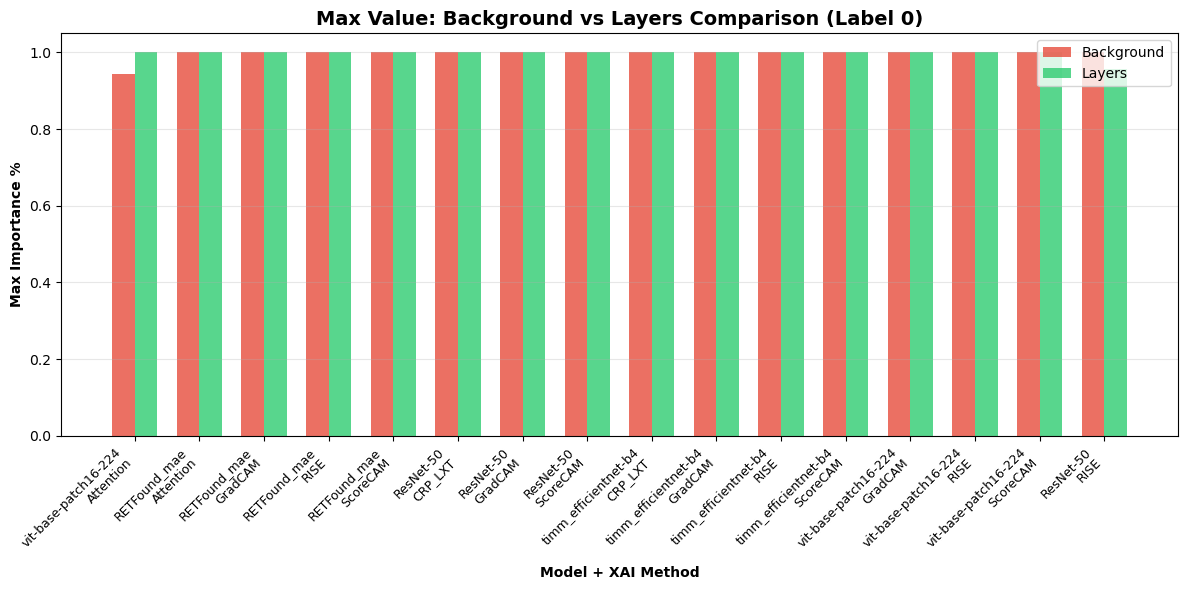


LABEL 1 (DME)
               Model       XAI  Max_Background  Max_Layers  Diff (BG - Layers)
vit-base-patch16-224 Attention            0.79         1.0               -0.21
        RETFound_mae  ScoreCAM            0.97         1.0               -0.03
vit-base-patch16-224      RISE            0.98         1.0               -0.02
        RETFound_mae Attention            1.00         1.0                0.00
        RETFound_mae   GradCAM            1.00         1.0                0.00
        RETFound_mae      RISE            1.00         1.0                0.00
           ResNet-50   CRP_LXT            1.00         1.0                0.00
           ResNet-50   GradCAM            1.00         1.0                0.00
           ResNet-50      RISE            1.00         1.0                0.00
           ResNet-50  ScoreCAM            1.00         1.0                0.00
timm_efficientnet-b4   CRP_LXT            1.00         1.0                0.00
timm_efficientnet-b4   GradCAM       

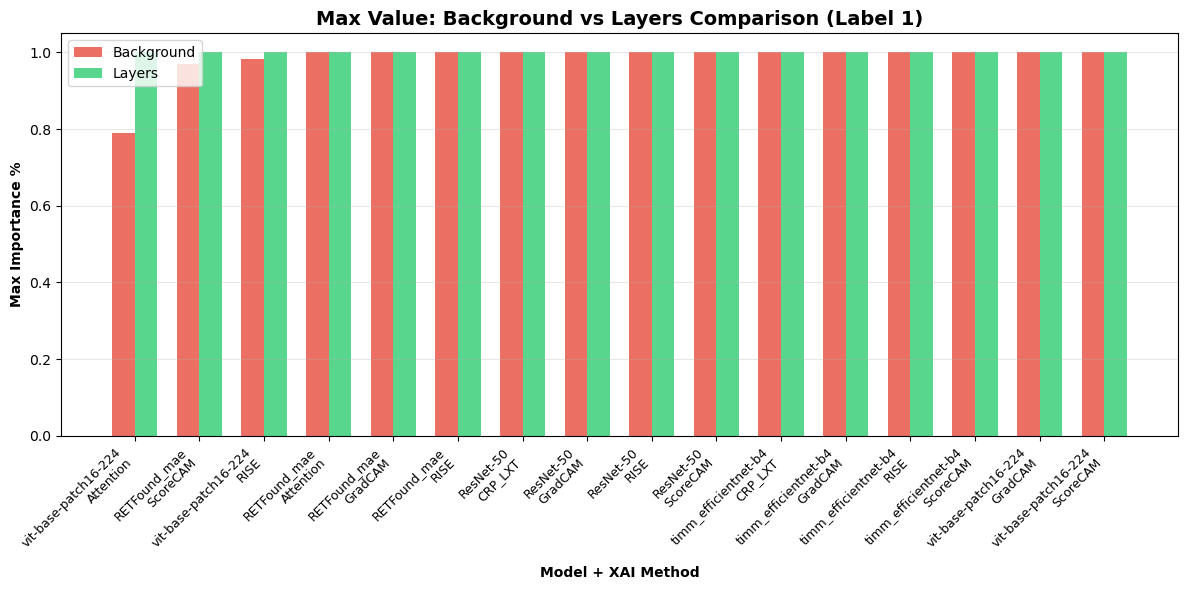


BOTH LABELS
               Model       XAI  Max_Background  Max_Layers  Diff (BG - Layers)
vit-base-patch16-224 Attention            0.94         1.0               -0.06
        RETFound_mae Attention            1.00         1.0                0.00
        RETFound_mae   GradCAM            1.00         1.0                0.00
        RETFound_mae      RISE            1.00         1.0                0.00
        RETFound_mae  ScoreCAM            1.00         1.0                0.00
           ResNet-50   CRP_LXT            1.00         1.0                0.00
           ResNet-50   GradCAM            1.00         1.0                0.00
           ResNet-50      RISE            1.00         1.0                0.00
           ResNet-50  ScoreCAM            1.00         1.0                0.00
timm_efficientnet-b4   CRP_LXT            1.00         1.0                0.00
timm_efficientnet-b4   GradCAM            1.00         1.0                0.00
timm_efficientnet-b4      RISE         

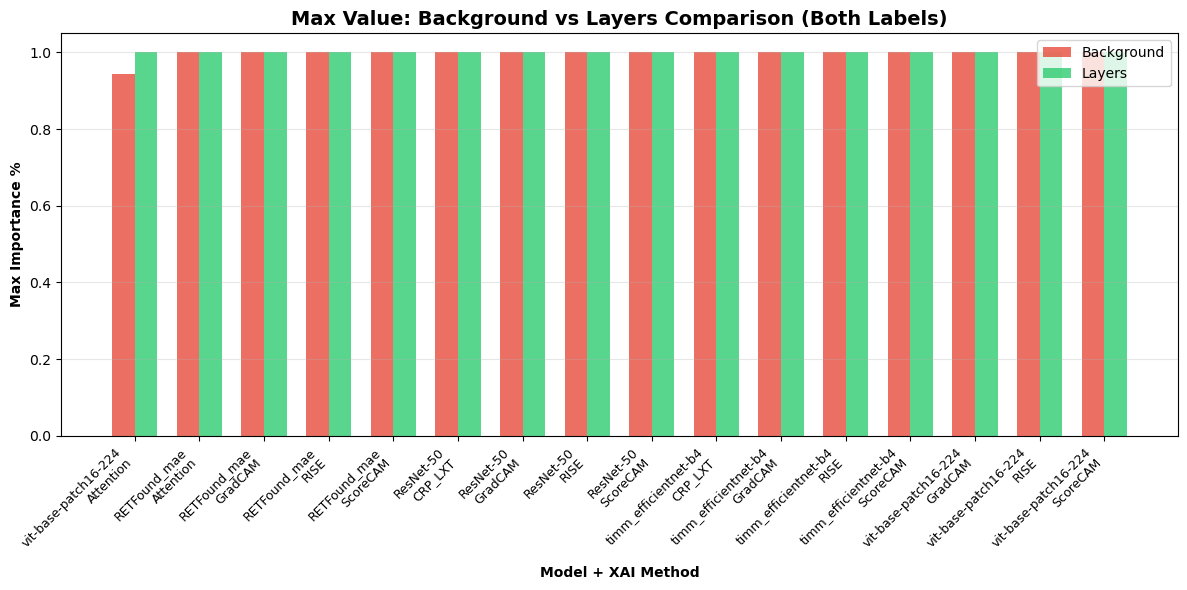

In [ ]:
# Function to calculate and visualize max comparison
def max_comparison_analysis(data, label_type, label_value=None):
    if label_value is not None:
        filtered_data = data[data['label'] == label_value]
        title_suffix = f"(Label {label_value})"
        filename_suffix = f"_label{label_value}"
    else:
        filtered_data = data
        title_suffix = "(Both Labels)"
        filename_suffix = "_both_labels"
    
    # Check which column to use
    col_name = 'max' if 'max' in filtered_data.columns else 'importance_percentage'
    
    # Calculate max for background and non-background
    bg_max = filtered_data[filtered_data['layer_name'] == 'Background'].groupby(['model', 'xai_method'])[col_name].max().reset_index()
    bg_max.columns = ['Model', 'XAI', 'Max_Background']
    
    layers_max = filtered_data[filtered_data['layer_name'] != 'Background'].groupby(['model', 'xai_method'])[col_name].max().reset_index()
    layers_max.columns = ['Model', 'XAI', 'Max_Layers']
    
    # Merge and calculate difference
    comparison_max = pd.merge(bg_max, layers_max, on=['Model', 'XAI'])
    comparison_max['Diff (BG - Layers)'] = comparison_max['Max_Background'] - comparison_max['Max_Layers']
    comparison_max = comparison_max.sort_values('Diff (BG - Layers)')
    
    print(f"\n{'='*80}")
    print(f"{label_type}")
    print('='*80)
    print(comparison_max.round(2).to_string(index=False))
    
    # Save to CSV
    csv_filename = f'output/output_max_background_vs_layers{filename_suffix}.csv'
    comparison_max.to_csv(csv_filename, index=False)
    print(f"\n✓ Saved to: {csv_filename}")
    
    # Visualize with bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(comparison_max))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, comparison_max['Max_Background'], width, label='Background', alpha=0.8, color='#e74c3c')
    bars2 = ax.bar(x + width/2, comparison_max['Max_Layers'], width, label='Layers', alpha=0.8, color='#2ecc71')
    
    ax.set_xlabel('Model + XAI Method', fontweight='bold')
    ax.set_ylabel('Max Importance %', fontweight='bold')
    ax.set_title(f'Max Value: Background vs Layers Comparison {title_suffix}', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f"{row['Model']}\n{row['XAI']}" for _, row in comparison_max.iterrows()], 
                        rotation=45, ha='right', fontsize=9)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyze for Label 0
max_comparison_analysis(df, "LABEL 0 (Control)", label_value=0)

# Analyze for Label 1
max_comparison_analysis(df, "LABEL 1 (DME)", label_value=1)

# Analyze for Both Labels
max_comparison_analysis(df, "BOTH LABELS", label_value=None)


# Importance between Layers


ALL LAYERS AND THEIR IMPORTANCE BY (MODEL, XAI)

✓ Saved to: output/output_all_layers_importance_by_xai.csv


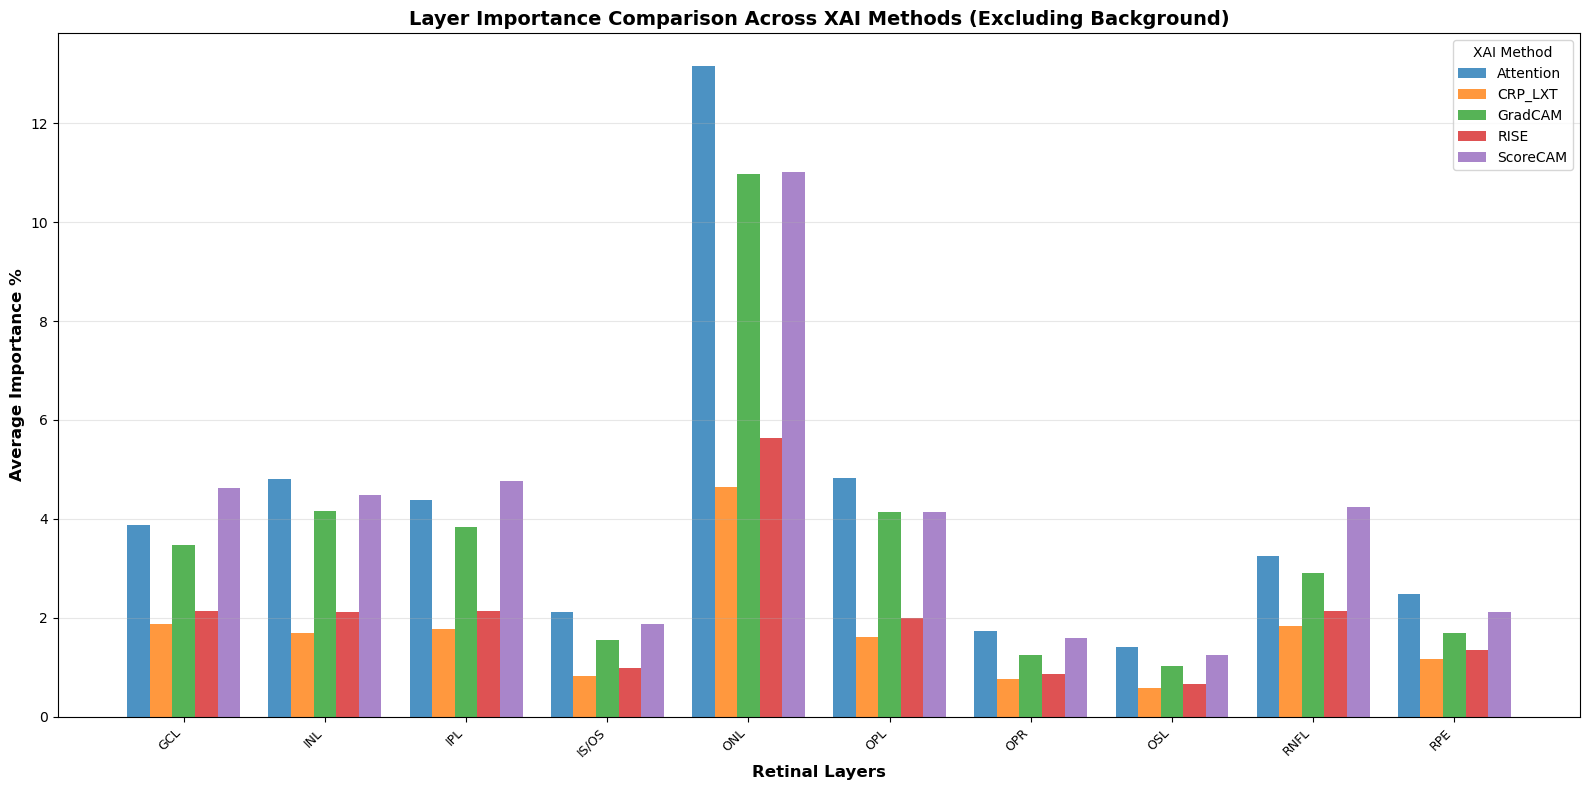


✓ Saved to: output/output_layer_importance_by_xai_no_background.csv


In [25]:
# All layers with their importance scores
print("\n" + "="*80)
print("ALL LAYERS AND THEIR IMPORTANCE BY (MODEL, XAI)")
print("="*80)

all_layers = df.groupby(['xai_method', 'layer_name'])['importance_percentage'].mean().reset_index()
all_layers.columns = ['XAI', 'Layer', 'Avg_Importance%']
all_layers['Avg_Importance%'] = all_layers['Avg_Importance%'].round(2)

for xai, group in all_layers.groupby(['XAI']):
    layer_data = group[['Layer', 'Avg_Importance%']].sort_values('Avg_Importance%', ascending=False)

# Save to CSV
all_layers_sorted = all_layers.sort_values(['XAI', 'Avg_Importance%'], ascending=[True, False])
all_layers_sorted.to_csv('output/output_all_layers_importance_by_xai.csv', index=False)
print(f"\n✓ Saved to: output/output_all_layers_importance_by_xai.csv")

# Get non-background layers only
layers_only = all_layers[all_layers['Layer'] != 'Background'].copy()

# Create separate bar plots for each XAI method
xai_methods = layers_only['XAI'].unique()
n_xai = len(xai_methods)

# Combined comparison plot across all XAI methods
fig, ax = plt.subplots(figsize=(16, 8))

# Prepare data for grouped bar plot
layer_names = sorted(layers_only['Layer'].unique())
x = np.arange(len(layer_names))
width = 0.8 / len(xai_methods)

for i, xai in enumerate(xai_methods):
    xai_data = layers_only[layers_only['XAI'] == xai].set_index('Layer')
    values = [xai_data.loc[layer, 'Avg_Importance%'] if layer in xai_data.index else 0 for layer in layer_names]
    ax.bar(x + i*width, values, width, label=xai, alpha=0.8)

ax.set_xlabel('Retinal Layers', fontweight='bold', fontsize=12)
ax.set_ylabel('Average Importance %', fontweight='bold', fontsize=12)
ax.set_title('Layer Importance Comparison Across XAI Methods (Excluding Background)', 
            fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(xai_methods)-1) / 2)
ax.set_xticklabels(layer_names, rotation=45, ha='right', fontsize=9)
ax.legend(title='XAI Method', fontsize=10)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Save layer importance statistics by XAI
layers_only_sorted = layers_only.sort_values(['XAI', 'Avg_Importance%'], ascending=[True, False])
layers_only_sorted.to_csv('output/output_layer_importance_by_xai_no_background.csv', index=False)
print(f"\n✓ Saved to: output/output_layer_importance_by_xai_no_background.csv")


# DME and Control Difference

In [26]:
# Label 0 vs Label 1 comparison
non_bg = df[df['layer_name'] != 'Background']
comparison = non_bg.groupby(['model', 'xai_method', 'label', 'layer_name'])['importance_percentage'].mean().reset_index()
pivot = comparison.pivot_table(index=['model', 'xai_method', 'layer_name'], columns='label', values='importance_percentage').reset_index()
pivot['Diff'] = pivot[1] - pivot[0]
pivot.columns = ['model', 'xai_method', 'layer_name', 'Label_0', 'Label_1', 'Diff']

# Save full comparison to CSV
pivot_sorted = pivot.sort_values(['model', 'xai_method', 'Diff'], ascending=[True, True, False])
pivot_sorted.to_csv('output/output_layer_comparison_label0_vs_label1.csv', index=False)
print(f"\n✓ Saved to: output/output_layer_comparison_label0_vs_label1.csv")

# Save top 3 discriminative layers for each model+XAI combination
top_layers_list = []
for (model, xai), group in pivot.groupby(['model', 'xai_method']):
    top3 = group.nlargest(3, 'Diff')[['model', 'xai_method', 'layer_name', 'Label_0', 'Label_1', 'Diff']]
    top_layers_list.append(top3)
top_layers_df = pd.concat(top_layers_list, ignore_index=True)
top_layers_df.to_csv('output/output_top3_discriminative_layers.csv', index=False)
print(f"✓ Saved to: output/output_top3_discriminative_layers.csv")



✓ Saved to: output/output_layer_comparison_label0_vs_label1.csv
✓ Saved to: output/output_top3_discriminative_layers.csv


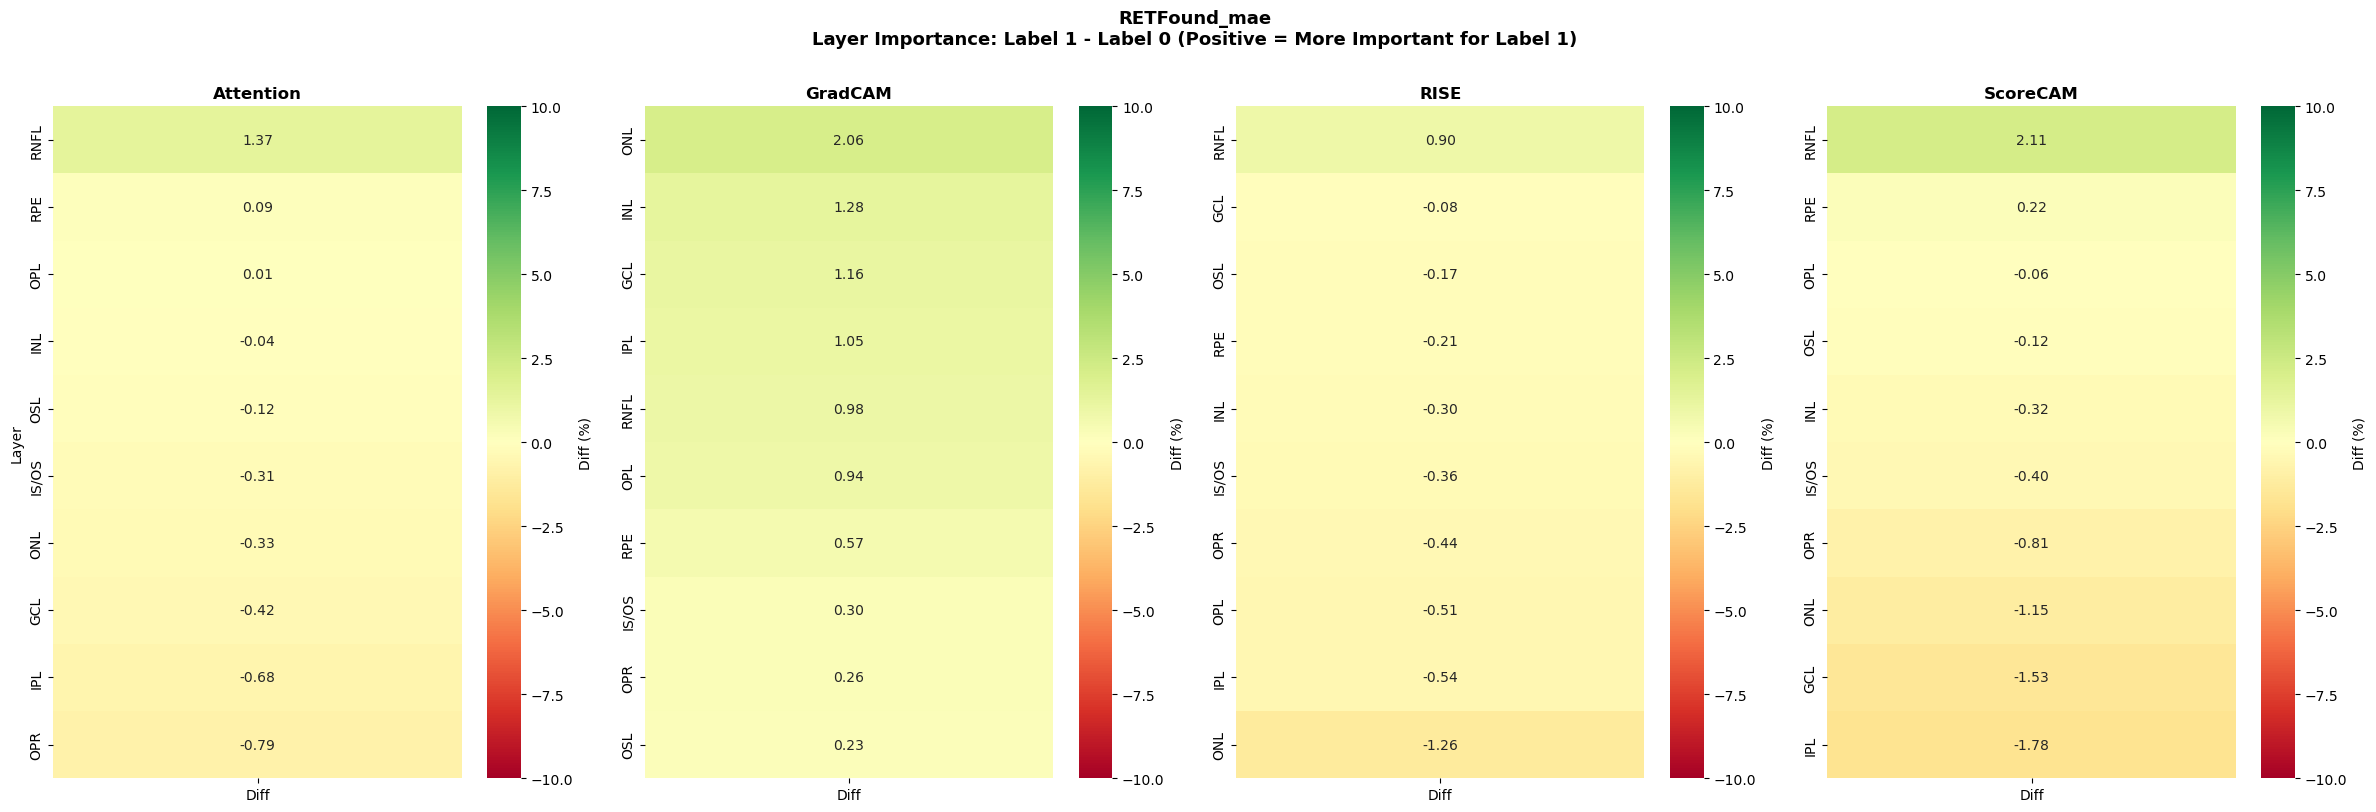

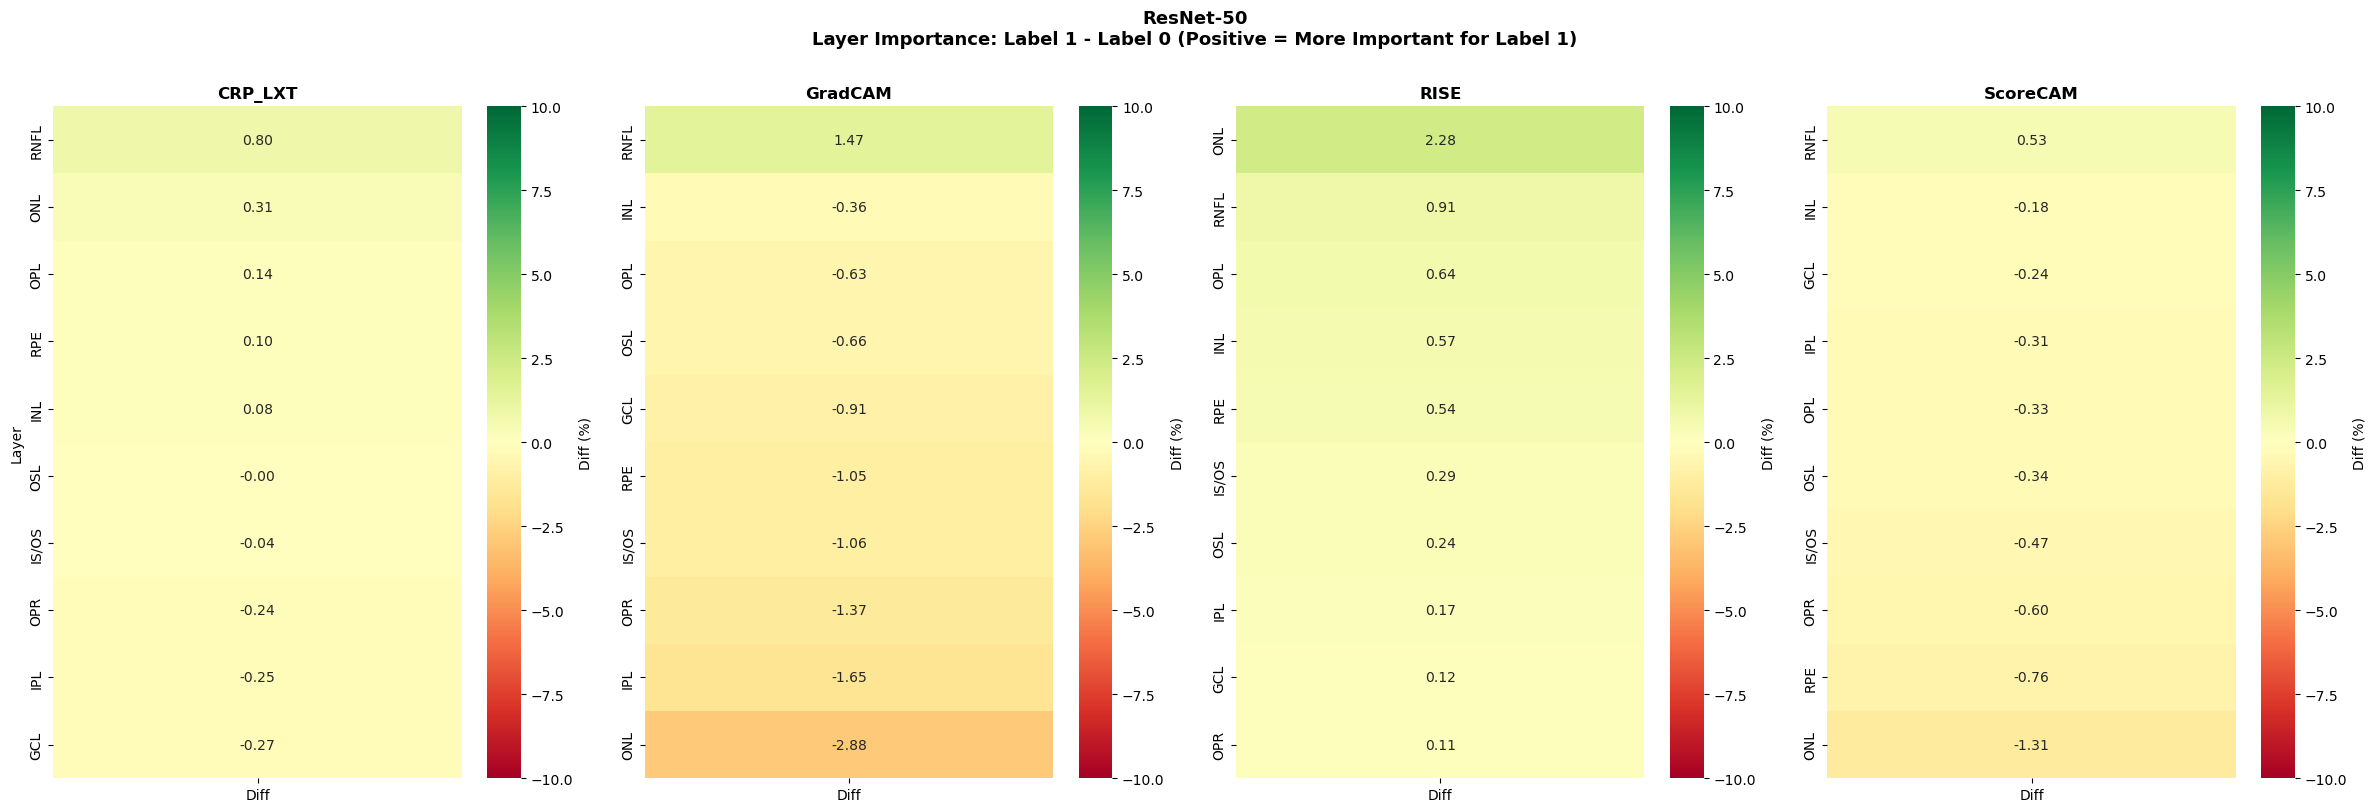

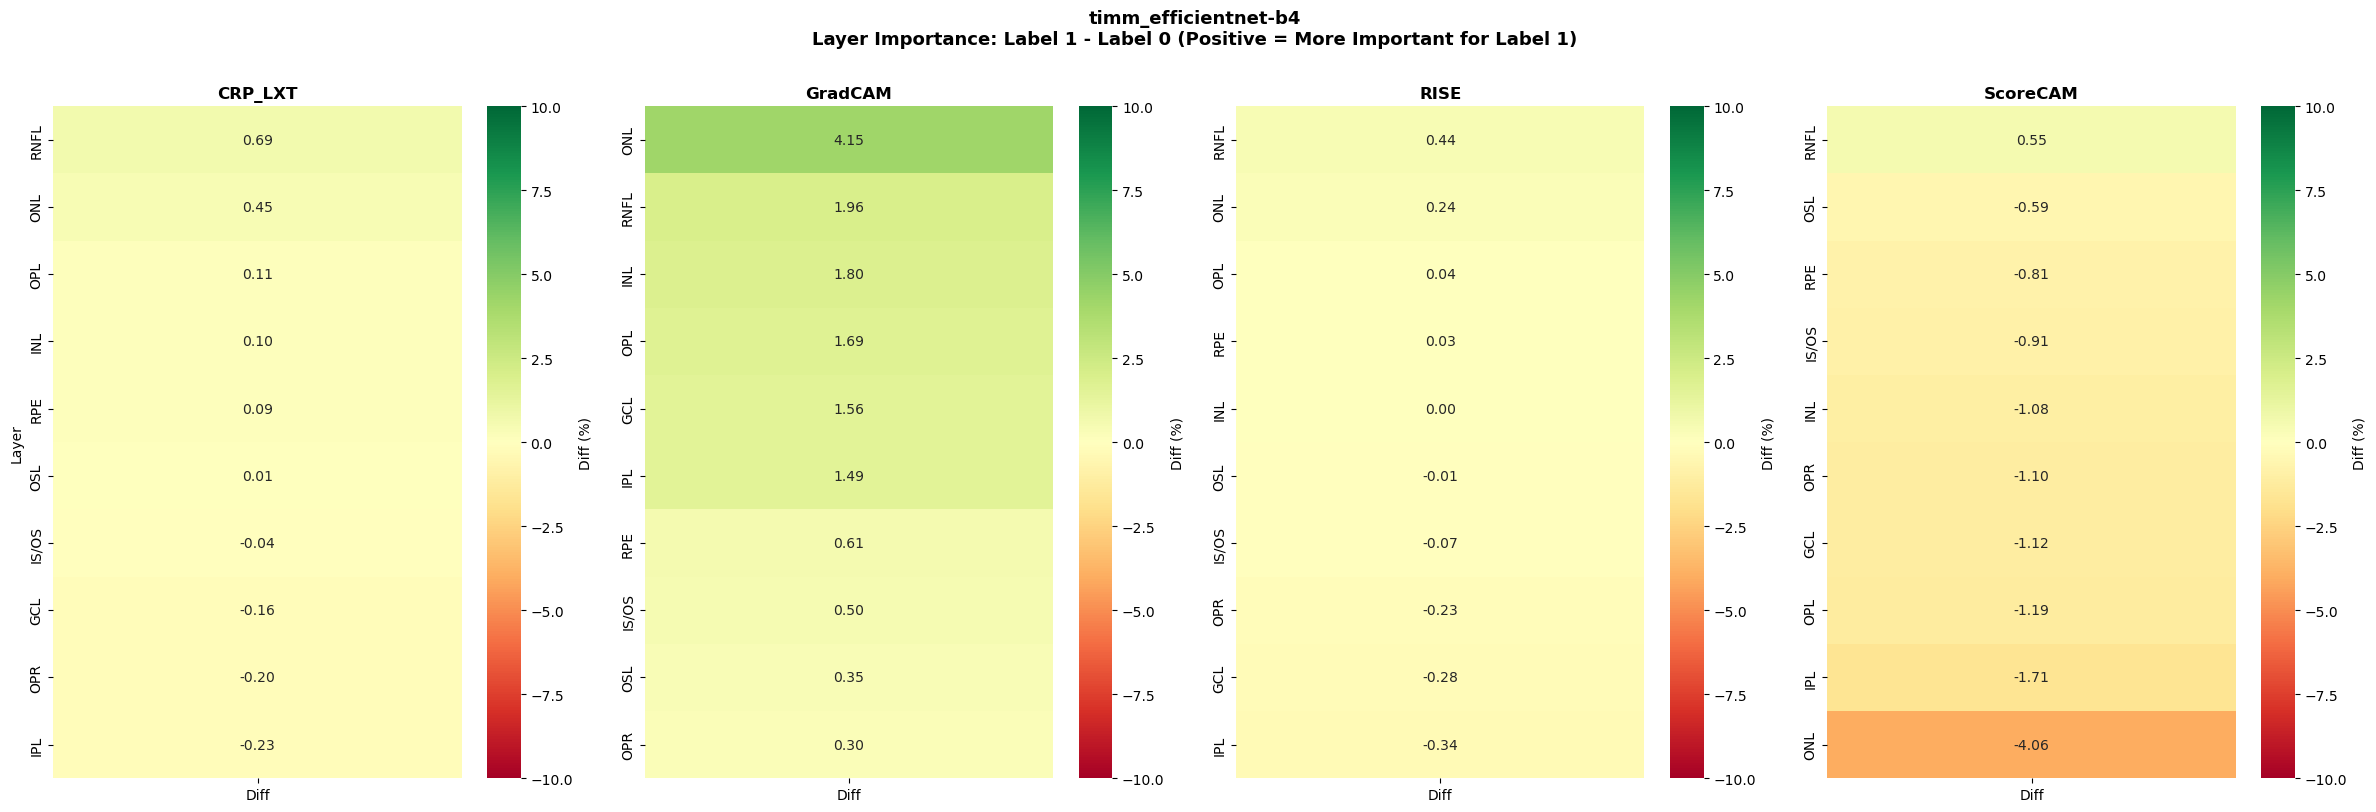

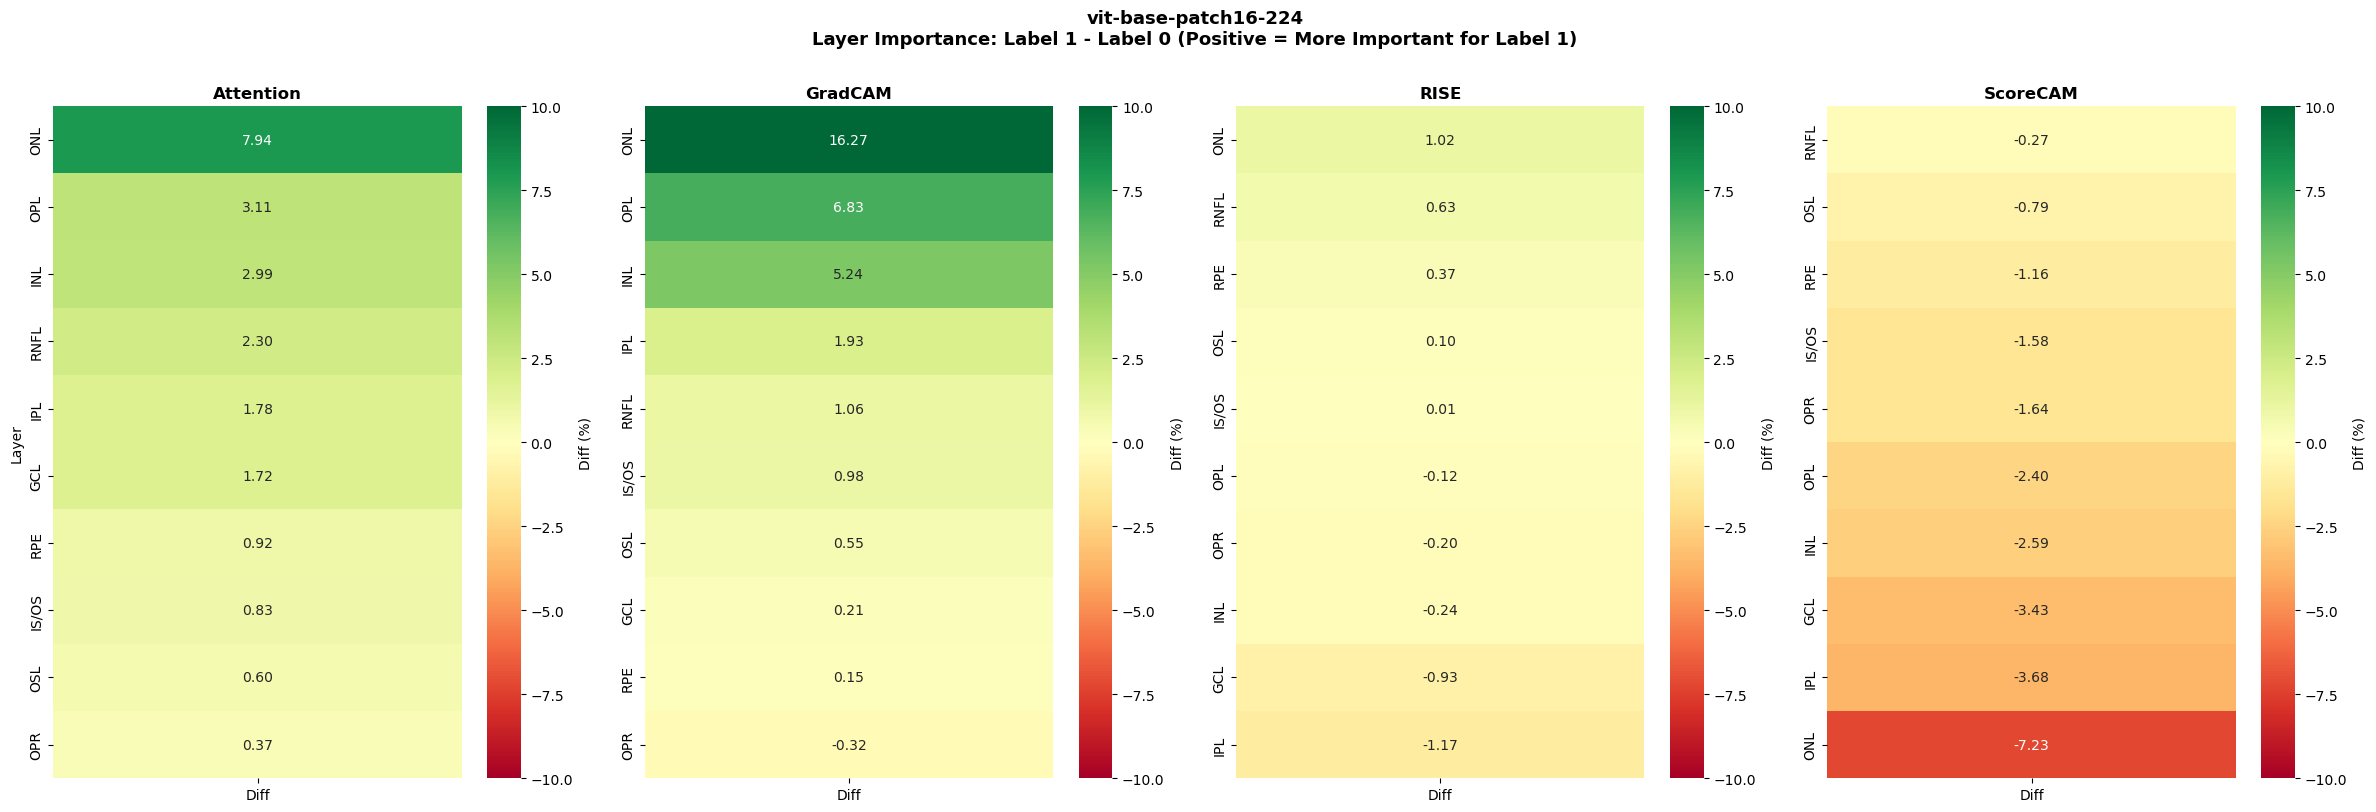

In [27]:
# Plot 3: Heatmap of layer differences (separate graph for each model)
for model in pivot['model'].unique():
    model_data = pivot[pivot['model'] == model]
    n_xai = len(model_data['xai_method'].unique())
    
    fig, axes = plt.subplots(1, n_xai, figsize=(6*n_xai, 8))
    if n_xai == 1:
        axes = [axes]
    
    for idx, (xai, group) in enumerate(model_data.groupby('xai_method')):
        data = group.set_index('layer_name')[['Diff']].sort_values('Diff', ascending=False)
        sns.heatmap(data, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=axes[idx], 
                   vmin=-10, vmax=10, cbar_kws={'label': 'Diff (%)'})
        axes[idx].set_title(f'{xai}', fontweight='bold')
        axes[idx].set_ylabel('Layer' if idx == 0 else '')
    
    plt.suptitle(f'{model}\nLayer Importance: Label 1 - Label 0 (Positive = More Important for Label 1)', 
                fontsize=13, fontweight='bold', y=1.01)
    plt.tight_layout()
    plt.show()


# Summaries Output

In [23]:
# Summary
print("\n" + "="*70)
print("SUMMARY")
print("="*70)

# Calculate total importance for non-background layers
layer_sum = df[df['layer_name'] != 'Background'].groupby(['model', 'xai_method'])['importance_percentage'].sum().reset_index()
layer_sum.columns = ['Model', 'XAI', 'Total_Importance']

best_bg = bg.loc[bg['Background%'].idxmin()]
worst_bg = bg.loc[bg['Background%'].idxmax()]
best_layer = layer_sum.loc[layer_sum['Total_Importance'].idxmax()]

print(f"\n✓ LEAST BACKGROUND: {best_bg['Model']} + {best_bg['XAI']} ({best_bg['Background%']:.2f}%)")
print(f"✗ MOST BACKGROUND: {worst_bg['Model']} + {worst_bg['XAI']} ({worst_bg['Background%']:.2f}%)")
print(f"\n✓ HIGHEST LAYER FOCUS: {best_layer['Model']} + {best_layer['XAI']} ({best_layer['Total_Importance']:.1f}%)")

print(f"\n✓ TOP 5 DISCRIMINATIVE LAYERS (across all model-XAI pairs):")
top5 = pivot.nlargest(5, 'Diff')[['model', 'xai_method', 'layer_name', 'Diff']]
for _, row in top5.iterrows():
    print(f"  {row['model']} + {row['xai_method']}: {row['layer_name']} (+{row['Diff']:.2f}%)")
print("\n" + "="*70)

# Save summary statistics to CSV
summary_data = {
    'Metric': [
        'Least Background',
        'Most Background', 
        'Highest Layer Focus',
    ],
    'Model': [
        best_bg['Model'],
        worst_bg['Model'],
        best_layer['Model']
    ],
    'XAI': [
        best_bg['XAI'],
        worst_bg['XAI'],
        best_layer['XAI']
    ],
    'Value': [
        f"{best_bg['Background%']:.2f}%",
        f"{worst_bg['Background%']:.2f}%",
        f"{best_layer['Total_Importance']:.1f}%"
    ]
}
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('output/output_summary_statistics.csv', index=False)
print(f"\n✓ Saved to: output/output_summary_statistics.csv")

# Save top 5 discriminative layers
top5.to_csv('output/output_top5_discriminative_layers.csv', index=False)
print(f"✓ Saved to: output/output_top5_discriminative_layers.csv")

# Save layer sum (total importance)
layer_sum.to_csv('output/output_layer_total_importance.csv', index=False)
print(f"✓ Saved to: output/output_layer_total_importance.csv")



SUMMARY

✓ LEAST BACKGROUND: vit-base-patch16-224 + GradCAM (16.19%)
✗ MOST BACKGROUND: ResNet-50 + ScoreCAM (90.83%)

✓ HIGHEST LAYER FOCUS: vit-base-patch16-224 + GradCAM (13187.6%)

✓ TOP 5 DISCRIMINATIVE LAYERS (across all model-XAI pairs):
  vit-base-patch16-224 + GradCAM: ONL (+16.27%)
  vit-base-patch16-224 + Attention: ONL (+7.94%)
  vit-base-patch16-224 + GradCAM: OPL (+6.83%)
  vit-base-patch16-224 + GradCAM: INL (+5.24%)
  timm_efficientnet-b4 + GradCAM: ONL (+4.15%)


✓ Saved to: output/output_summary_statistics.csv
✓ Saved to: output/output_top5_discriminative_layers.csv
✓ Saved to: output/output_layer_total_importance.csv
